Введите 1, если нормальное распределение, 2 если показательное распределение и 3, если равномерное 
на отрезке [a, b]
2
Показательное распределение с параметром l=  2.38
0.60881	0.49295	0.86891	0.06223	0.37564	0.20449	0.08702	0.19429	0.14321	0.04777	
0.75209	0.39065	0.0843	0.12407	0.10389	0.43091	0.03632	0.20592	0.43598	0.20914	
0.01659	0.0792	0.40551	0.61906	0.10939	0.88378	0.0762	0.0352	0.05115	0.47469	
0.76039	0.44908	0.00699	0.50444	0.59047	0.74882	1.14518	0.14712	0.33591	0.20937	
0.46567	0.99627	0.00787	0.05307	0.09566	0.03202	0.19249	0.02147	0.02997	0.05221	
0.03292	0.12373	0.01381	0.67347	0.46949	0.36664	0.12993	0.14636	1.98057	0.00156	
0.42194	0.6269	0.6041	0.07375	0.02748	0.55553	0.73662	0.46462	0.55671	0.14122	
0.306	0.36815	0.12836	0.01146	0.09714	0.47649	0.05572	1.48494	0.90064	0.44696	
0.1351	0.13732	0.61234	0.24749	0.1301	0.33543	0.09662	0.33671	0.55659	0.12764	
0.04062	0.00359	0.80981	0.28631	1.93595	0.11226	0.587	0.60198	0.80471	0.57717	
0.99619	0.00799	0.50768	0.30651	

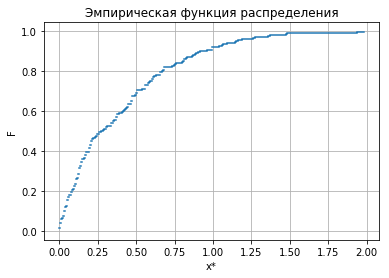

h= 0.247528810905463


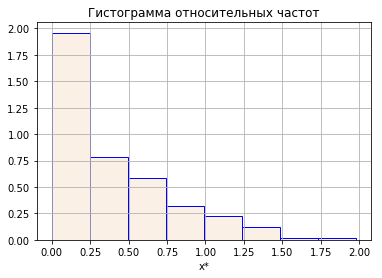

Выборочное среднее  0.41089565
Выборочная дисперсия  0.1299625964265548
Выборочное среднее квадратическое отклонение  0.36050325439107317
Выборочная медиана  0.2665694886674217
Выборочный коэффициент асимметрии  1.4075296297976552
Выборочный коэффициент эксцесса  1.563323902895104

Показательное распределение
show distribution ...
0.39617  0.23922  0.14445  0.08722  0.05267  0.0318  0.0192  0.01161  
show deviation ...

0.08883  0.04422  0.00055  0.00722  0.00233  0.0018  0.0142  0.00661  


In [4]:
# узнать про условие выборочной моды, дописать ассиметрию и эксцесс
import numpy
import math
import matplotlib.pyplot as plt
import scipy.stats as sts

def selav_kfunc(selection, relative_frequency, k=1):    #
    selective_average = 0
    for i in range(len(selection)):
        selective_average += (selection[i]**k) * relative_frequency[i]
    return selective_average

def selav_central_kfunc(x, sel_av, rel_freq, k=1):    #
    ans = 0
    for i in range(len(x)):
        ans += (x[i] - sel_av)**k  * rel_freq[i]
    return ans

def show_distrib(distrib):       #
    for i in range(len(distrib)):
        print(round(distrib[i], 5), end="\t")
        if (i+1)%10==0:
            print()
    print()

#
mu = (-1)**(38) * 0.1*38
sigma = 0.01*38 + 1
#
l= 2 + (-1)**(38)*0.38
#
a=(-1)**(38) * 0.05*38
b= a + 0.05*38 + 1

length = 200

print("Введите 1, если нормальное распределение, 2 если показательное распределение и 3, если равномерное \nна отрезке [a, b]")
inp = int(input())
if inp==1:
    print("Нормальное распределение с параметрами a=",mu, " и сигма=", sigma)
    distrib = numpy.random.normal(loc=mu, scale=sigma, size=200) # 
elif inp == 2:
    print("Показательное распределение с параметром l= ", l)
    distrib = numpy.random.exponential(scale=1/l, size=200)
else:
    print("Равномерное распределение с параметрами a= ", a, " и b= ", b)
    distrib=numpy.random.uniform(low=a, high=b, size=200)

save_distrib = distrib #
show_distrib(distrib)

print("Sorting ... ")
distrib = numpy.sort(distrib) #
show_distrib(distrib)
    

#inp = list(map(int, input().split()))
#print(numpy.sort(inp))

# группированная выборка
sterges_coef = 1 + math.floor(math.log2(length))
print("Коэффициент Стерджеса =", sterges_coef)
h = (distrib[len(distrib)-1] - distrib[0])/sterges_coef

if inp == 2:  # Для показательного распределения положить selection[0]=0
    selection = [0]
else:
    selection = [distrib[0]]
    
for i in range(sterges_coef):
    if  (selection[i] + h < distrib[len(distrib)-1]):
        selection.append(selection[i] + h)
if inp == 2:
    selection.pop()
selection.append(distrib[len(distrib)-1])

print(selection)
print("Группированная выборка:\n")
for i in range(len(selection)-1):
    print("["+ str(round(selection[i], 5)) + ", " + str(round(selection[i+1], 5)) + "]", end=" ")

# частота 
k=0
frequency =[0] 
for i in range(len(distrib)):
    if k < len(selection)-1:
        if distrib[i] <= selection[k+1]:
            frequency[k]+=1
        else:
            #print(distrib[i])
            #print(selection[k+1])
            frequency.append(1)
            k+=1
        
print("\nчастота :\n", frequency)
check = 0
for i in range(len(frequency)):
    check += frequency[i]
print("Сумма элементов частоты =", check) 

# относительная частота
relative_frequency = []
for i in range(len(frequency)):
    relative_frequency.append(frequency[i]/length)
    
print("относительная частота :\n", relative_frequency)

check=0
for i in range(len(relative_frequency)):
    check += relative_frequency[i]
print("Сумма элементов относительной частоты =", round(check, 1))

# получим выборку x*
x=[]
for i in range(len(selection)-1):
    x.append(round((selection[i]+selection[i+1])/2, 5))
print("\nАссоциированный статистический ряд")

print("Выборка:\t", end = " ")
for i in range(len(x)):
    print(x[i], end="\t")
print("\nЧастота:\t", end=" ")
for i in range(len(x)):
    print(frequency[i], end="\t")
print("\nОтносительная частота:\t", end=" ")
for i in range(len(x)):
    print(relative_frequency[i], end="\t")

# Эмпирическая функция распределения

emp_distrib_func=[]
y = []

for i in range(1, len(distrib)):
    y.append(distrib[i-1])
    emp_distrib_func.append(i/length)
    
    y.append(distrib[i])
    emp_distrib_func.append(i/length) 
    
    y.append(numpy.nan)
    emp_distrib_func.append(numpy.nan)


#print("y =\n", y)
#print("emp_distrib_func =\n", emp_distrib_func)

print("\nЭмпирическая функция распределения") 

#plt.xticks(1)
plt.plot(y, emp_distrib_func)
plt.title("Эмпирическая функция распределения")
plt.xlabel("x*")
plt.ylabel("F")
plt.grid(True)
plt.show()


# Гистограмма
hist = []
print("h=", h)
for i in range(len(relative_frequency)):
    hist.append(relative_frequency[i]/h)

#print("HIST= ", hist)
#print("x=", selection)

if len(hist) > len(x):
    del hist[-1]

fig = plt.figure()
plt.bar(x, hist, width=h, color='linen', edgecolor='b')
plt.xlabel("x*")
plt.title("Гистограмма относительных частот")
plt.grid(True)
plt.show() 

 
# Выборочное среднее
select_average = selav_kfunc(x, relative_frequency)
print("Выборочное среднее ", select_average)

# Выборочная дисперсия с поправкой Шеппарда
selective_disp = 0
for i in range(len(x)):
    selective_disp += ((x[i]-select_average)**2)*relative_frequency[i]
selective_disp -= h**2/12

print("Выборочная дисперсия ", selective_disp)

#Выборочное среднее квадратическое отклонение
sample_standard_deviation = math.sqrt(selective_disp)
print("Выборочное среднее квадратическое отклонение ", sample_standard_deviation)

# Мода
max=-1
for i in range(len(frequency)):
    if frequency[i] > max:
        max=frequency[i]
        index=i
    elif frequency[i] == max:
        index=-1
        
if index == -1:
    print("Моды не существует")
else:
    #index+=1
    mode = selection[index] + h*(relative_frequency[index] - relative_frequency[index-1])/(2*relative_frequency[index] - relative_frequency[index-1] -relative_frequency[index+1])


# Выборочная медиана
wi = [relative_frequency[0]]
eq = False # проверка на равенство суммы 0.5 
for i in range(1,len(relative_frequency)):
    wi.append(wi[len(wi)-1] + relative_frequency[i])
    if wi[len(wi)-1]>=0.5:
        if wi[len(wi)-1] == 0.5:
            ind = len(wi)
            eq = True
            break
        else:
            if wi[len(wi)-2] < 0.5:
                #print(wi[len(wi)-2], wi[len(wi)-1])
                ind = len(wi)-1
                break
if eq:
    median = selection[ind]
else:
    #print("selection[ind]=", selection[ind])
    #print("+ +", h*(0.5 - wi[len(wi)-2])/relative_frequency[ind])
    median = selection[ind] + h*(0.5 - wi[len(wi)-2])/relative_frequency[ind]
print("Выборочная медиана ", median)

    
# Выборочный коэффициент асимметрии
asymmetry_coeff = selav_central_kfunc(x, select_average, relative_frequency, 3)/(sample_standard_deviation**3)
print("Выборочный коэффициент асимметрии ", asymmetry_coeff)

# Выборочный коэффициент эксцесса
coef_kurt= selav_central_kfunc(x, select_average, relative_frequency, 4)/(sample_standard_deviation**4) - 3
print("Выборочный коэффициент эксцесса ", coef_kurt)

# подсчет вероятности для распределений
def exp_prob(x, l=2.038): #показательное распределение
    if x <= 0:
        return 0
    else:
        return 1-math.exp(-l*x)

def cont_prob(x, a=1.9, b=4.8): # равномерное распределение
    if x <= a:
        return 0
    elif x >= b:
        return 1
    else:
        return (x-a)/(b-a)

def norm_prob(x, mu=3.8, sigma=1.38):
    norm1 = sts.norm.cdf(x, loc=mu, scale=sigma) # нормальное распределение
    return norm1

def prob_show(prob):
    print("show distribution ...")
    for i in range(len(prob)):
        print(round(prob[i],5), end= "  ")
    print()
        
def deviation(w, prob):
    dev=[]
    for i in range(len(w)):
        dev.append(abs(w[i] - prob[i]))
    return dev

def dev_show(dev):
    print("show deviation ...\n") 
    for i in range(len(dev)):
        print(round(dev[i],5), end= "  ")
    print()

# для каждого интервала (x[i], x[i+1]), i=0, n-1 вычислим вероятность по формуле F(x[i+1])-F(x[i])

if inp==1:
    norm_gr = selection # значения групповой выборки
    normw = relative_frequency # относительная частота
    norm_pr = []
    for i in range(len(norm_gr)-1):
        norm_pr.append(norm_prob(norm_gr[i+1]) - norm_prob(norm_gr[i])) # вероятности по формуле F(x[i+1])-F(x[i])
    print("\nНормальное распределение")
    prob_show(norm_pr)
    
    norm_dev = deviation(normw, norm_pr)
    dev_show(norm_dev)
elif inp == 2:
    exp_gr = selection
    expw = relative_frequency
    exp_pr = []
    for i in range(len(exp_gr)-1):
        exp_pr.append(exp_prob(exp_gr[i+1]) - exp_prob(exp_gr[i]))
    print("\nПоказательное распределение")
    prob_show(exp_pr)
    
    exp_dev = deviation(expw, exp_pr)
    dev_show(exp_dev)
else:
    cont_gr = selection
    contw = relative_frequency
    cont_pr = []
    for i in range(len(cont_gr)-1):
        cont_pr.append(cont_prob(cont_gr[i+1]) - cont_prob(cont_gr[i]))
    print("\nРавномерное распределение")
    prob_show(cont_pr)
    
    cont_dev = deviation(contw, cont_pr)
    dev_show(cont_dev)

In [13]:

def norm_prob(x, mu=3.8, sigma=1.38):
    norm1 = sts.norm.cdf(x, loc=mu, scale=sigma) # нормальное распределение
    return norm1

norm_gr = selection # значения групповой выборки
normw = relative_frequency # относительная частота
norm_pr = []
for i in range(len(norm_gr)-1):
    norm_pr.append(norm_prob(norm_gr[i+1]) - norm_prob(norm_gr[i])) # вероятности по формуле F(x[i+1])-F(x[i])
print("\nНормальное распределение")
prob_show(norm_pr)

norm_dev = deviation(normw, norm_pr)
dev_show(norm_dev)


Нормальное распределение
show distribution ...
0.034729422518403094  0.09180892744271912  0.17219685413950553  0.22919987685148763  0.2165195723427381  0.14516589351847098  0.06906444265997735  0.023310686148172777  
show deviation ...

0.010270577481596904  0.028191072557280872  0.04280314586049447  0.06919987685148762  0.0015195723427381125  0.01016589351847097  0.025935557340022647  0.008310686148172777  


In [2]:
# Выборочная медиана
selection = [0.65592, 1.47597, 2.29602, 3.11607 , 3.93613 , 4.75618, 5.57623 , 6.39628 , 7.21633 ]
relative_frequency = [0.045, 0.12, 0.215, 0.16, 0.215, 0.135, 0.095, 0.015] 
h = (7.21633 -0.65592)/8
wi = [relative_frequency[0]]
eq = False # проверка на равенство суммы 0.5 
for i in range(1,len(relative_frequency)):
    wi.append(wi[len(wi)-1] + relative_frequency[i])
    if wi[len(wi)-1]>=0.5:
        if wi[len(wi)-1] == 0.5:
            ind = len(wi)
            eq = True
            break
        else:
            if wi[len(wi)-2] < 0.5:
                #print(wi[len(wi)-2], wi[len(wi)-1])
                ind = len(wi)-1
                break
if eq:
    median = selection[ind]
else:
    #print("selection[ind]=", selection[ind])
    #print("+ +", h*(0.5 - wi[len(wi)-2])/relative_frequency[ind])
    median = selection[ind] + h*(0.5 - wi[len(wi)-2])/relative_frequency[ind]
print("Выборочная медиана ", median)



Выборочная медиана  3.7311084375


In [3]:
selection = [1.9177 , 2.27549, 2.63326, 2.99103, 3.3488, 3.70657, 4.06433, 4.4221, 4.77987]
relative_frequency = [0.125, 0.105, 0.15, 0.145, 0.1, 0.095, 0.13, 0.15]
h = (4.77987 - 1.91772)/8
wi = [relative_frequency[0]]
eq = False # проверка на равенство суммы 0.5 
for i in range(1,len(relative_frequency)):
    wi.append(wi[len(wi)-1] + relative_frequency[i])
    if wi[len(wi)-1]>=0.5:
        if wi[len(wi)-1] == 0.5:
            ind = len(wi)
            eq = True
            break
        else:
            if wi[len(wi)-2] < 0.5:
                #print(wi[len(wi)-2], wi[len(wi)-1])
                ind = len(wi)-1
                break
if eq:
    median = selection[ind]
else:
    #print("selection[ind]=", selection[ind])
    #print("+ +", h*(0.5 - wi[len(wi)-2])/relative_frequency[ind])
    median = selection[ind] + h*(0.5 - wi[len(wi)-2])/relative_frequency[ind]
print("Выборочная медиана ", median)


Выборочная медиана  3.2871144827586205
